In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
def pretty_dataset_name(dataset_name):
    if dataset_name == 'eth':
        return 'ETH - Univ'
    elif dataset_name == 'hotel':
        return 'ETH - Hotel'
    elif dataset_name == 'univ':
        return 'UCY - Univ'
    elif dataset_name == 'zara1':
        return 'UCY - Zara 1'
    elif dataset_name == 'zara2':
        return 'UCY - Zara 2'
    else:
        return dataset_name

# Runtime Analysis

In [3]:
runtime_df = pd.concat([pd.read_csv(f) for f in glob.glob('plots/data/*_runtimes.csv')], ignore_index=True)

In [4]:
runtime_df.head()

,data_precondition,dataset,method,runtime,num_samples,num_agents
0,curr,eth,sgan,6.811202,200,18
1,curr,eth,sgan,6.790546,200,3
2,curr,eth,sgan,7.577381,200,10
3,curr,eth,sgan,7.142080,200,9
4,curr,eth,sgan,6.387951,200,7


In [5]:
runtime_df.dtypes

data_precondition     object
dataset               object
method                object
runtime              float64
num_samples            int64
num_agents             int64
dtype: object

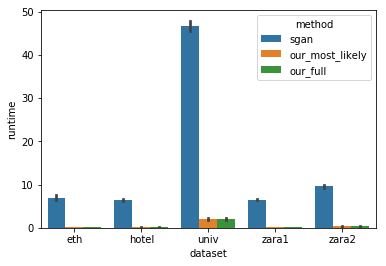

In [6]:
sns.barplot(data=runtime_df, x='dataset', y='runtime', hue='method')

In [7]:
from statsmodels.stats.weightstats import ttest_ind, DescrStatsW

In [9]:
dataset_names = ['eth', 'hotel', 'univ', 'zara1', 'zara2']

In [10]:
times_df = runtime_df[runtime_df['data_precondition'] == 'curr']

In [13]:
for dataset in dataset_names:
    sgan_times = times_df[(times_df['method'] == 'sgan') & (times_df['dataset'] == dataset)]['runtime']
    our_full_times = times_df[(times_df['method'] == 'our_full') & (times_df['dataset'] == dataset)]['runtime']
    our_most_likely_times = times_df[(times_df['method'] == 'our_most_likely') & (times_df['dataset'] == dataset)]['runtime']
    
    print()
    print(dataset)
    sgan_mean = np.mean(sgan_times)
    our_full_mean = np.mean(our_full_times)
    our_ml_mean = np.mean(our_most_likely_times)
    print('sgan', sgan_mean)
    print('our_full', our_full_mean, sgan_mean/our_full_mean, ttest_ind(our_full_times, sgan_times)[1])
    print('our_ml', our_ml_mean, sgan_mean/our_ml_mean, ttest_ind(our_most_likely_times, sgan_times)[1])


eth
sgan 6.983967280387878
our_full 0.13338356018066405 52.360030508469734 3.7452979502554264e-46
our_ml 0.13262226581573486 52.660593886183406 3.686743723957139e-46

hotel
sgan 6.459364819526672
our_full 0.08026709556579589 80.47338419305149 9.452267695982277e-67
our_ml 0.0816190242767334 79.14043174083865 9.704581166673674e-67

univ
sgan 46.70701649188995
our_full 2.000281834602356 23.35021779627121 1.2149703311224568e-56
our_ml 1.9612282514572144 23.815186456337308 8.858205614820596e-57

zara1
sgan 6.47512412071228
our_full 0.1579047918319702 41.00650807103179 2.1399239417809476e-43
our_ml 0.16170296669006348 40.04332297207118 2.258154843439474e-43

zara2
sgan 9.563817477226257
our_full 0.36574907302856446 26.148576120873276 7.788181785350645e-19
our_ml 0.3637690544128418 26.29090452090043 7.722579802526604e-19
